In [56]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import urllib2
import re
from subprocess import PIPE, Popen
import os
import glob
import re
import math

In [57]:
processArray = glob.glob('data/geo-preprocessed/'+'*.csv')
processArray

['data/geo-preprocessed/GSE20067_series_matrix_final.csv',
 'data/geo-preprocessed/GSE17448_series_matrix_final.csv']

In [58]:
#Creating one large dataframe from all of the normalized data
for dfInd in range(0, len(processArray)):
    df = pd.read_csv(processArray[dfInd])
    if (dfInd == 0):
        preprocFull = df
    else:
        preprocFull = preprocFull.append(df)

In [59]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(preprocFull.shape[0]), train_size=0.7)
mask=np.ones(preprocFull.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)
mask.shape, mask.sum()

((211,), 147)

In [60]:
#Setting up the x and y matrices. metColumns contains the column names for the variables we want to include
#in our regression. Right now it only contains the CpG sites, because the gender is not available for all 
#datasets. You can add variables by appending the column name into metColumns
metColumns = preprocFull.columns[[re.match('cg0', col) != None for col in preprocFull.columns]]
metDFx = preprocFull[metColumns]
metDFy = pd.DataFrame(preprocFull['age'])

In [61]:
def replaceNan(column):
    columnFix = column.fillna(column.mean())
    return columnFix
metDFx = metDFx.apply(replaceNan)
metDFy = metDFy.apply(replaceNan)['age']

In [62]:
Xmatrix_train=metDFx[mask]
Xmatrix_test=metDFx[~mask]
Yresp_train=metDFy[mask]
Yresp_test=metDFy[~mask]

In [63]:
from sklearn import linear_model
from sklearn.linear_model import LassoCV
regModel = LassoCV(cv=5, max_iter=10000).fit(Xmatrix_train, Yresp_train)

In [64]:
regModel.alpha_

0.0058332615074359233

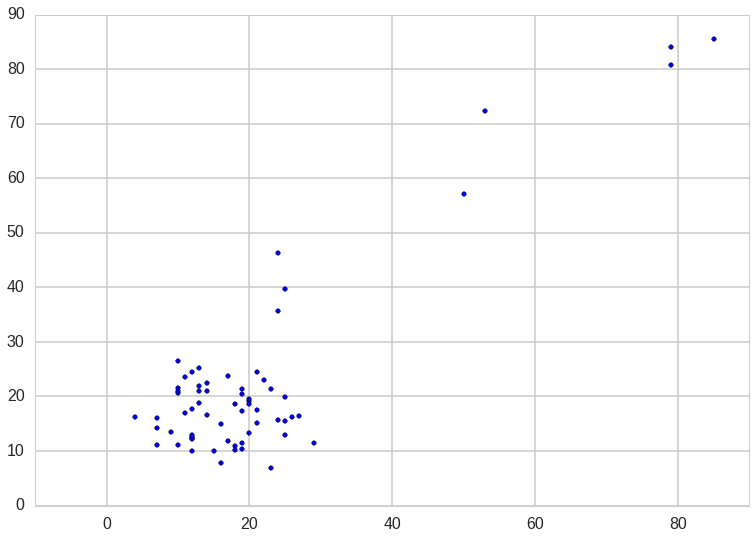

In [71]:
agePredictions = regModel.predict(Xmatrix_test)
plt.scatter(Yresp_test.values, agePredictions)